# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 3 - Parte 1</font>
## <font color='blue'>Análise Estatística de Séries Temporais</font>

![title](imagens/Lab3.png)

Leia os manuais em pdf disponibilizados ao longo do capítulo.

### O Processo de Análise de Séries Temporais

A análise de séries temporais é um processo estatístico que envolve a coleta, modelagem e previsão de dados ao longo do tempo. Ela é usada para identificar padrões, tendências e relações temporais nos dados, permitindo fazer previsões e tomar decisões informadas. O processo pode ser resumido nas seguintes etapas:

**1- Coleta de Dados**: Obtenção de dados sequenciais ao longo de um período de tempo. Os dados podem ser coletados em intervalos regulares (diários, mensais, anuais, etc.) ou irregulares.

**2- Visualização**: Análise gráfica das séries temporais para identificar padrões visuais, como sazonalidade, tendências, ciclos e ruídos.

**3- Decomposição**: Separação dos componentes principais da série temporal, como tendência, sazonalidade e resíduos (ou ruído).

**4- Estacionariedade**: Verificação da estacionariedade dos dados, ou seja, se suas propriedades estatísticas permanecem constantes ao longo do tempo. Caso os dados não sejam estacionários, pode ser necessário aplicar transformações, como diferenciação ou logaritmo.

**5- Seleção do Modelo**: Escolha de um modelo adequado para ajustar os dados, como modelos ARIMA (Autoregressive Integrated Moving Average), SARIMA (Seasonal ARIMA), modelos de médias móveis exponenciais (EMA), modelos de estado espaço, entre outros.

**6- Estimativa de Parâmetros e Validação**: Ajuste do modelo escolhido aos dados e verificação de sua adequação por meio de métricas de desempenho, como erro quadrático médio (MSE), erro absoluto médio (MAE) e coeficiente de determinação (R²).

**7- Previsão (Forecast)**: Utilização do modelo ajustado para realizar previsões futuras, com base nos padrões identificados na série temporal.

**8- Avaliação e Atualização**: Monitoramento do desempenho do modelo em relação às novas observações e ajuste dos parâmetros, se necessário, para melhorar as previsões futuras.

Neste capítulo trabalharemos nos itens de 1 a 4.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.26.4
pandas     : 2.0.3
matplotlib : 3.8.2
statsmodels: 0.14.1
seaborn    : 0.13.2



## Carregando e Explorando os Dados

In [5]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv', header = None)

In [6]:
# Visualizando os Dados
dados.head()

,0,1
0,2012-01,113
1,2012-02,119
2,2012-03,134
3,2012-04,129
4,2012-05,121


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória (veículos produzidos) e a data, que representa o índice da série. Veja que a série é mensal.

Vamos ajustar o nome de cada coluna.

In [7]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'veiculos_produzidos']

In [8]:
# Shape dos Dados
dados.shape

(144, 2)

In [9]:
# Tipos dos Dados
dados.dtypes

mes                    object
veiculos_produzidos     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [10]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

In [11]:
# Resumo estatístico da variável veiculos_produzidos. A média é de 280.
dados.describe()

,veiculos_produzidos
count,144.000000
mean,280.340278
std,119.917289
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
# Qual será o mês com o maior número de veículos produzidos?
dados.max()

mes                    2023-12
veiculos_produzidos        622
dtype: object

In [13]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 2012-01
Final do Período de Tempo: 2023-12


## Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [14]:
# Visualizando os Dados
dados.head()

,mes,veiculos_produzidos
0,2012-01,113
1,2012-02,119
2,2012-03,134
3,2012-04,129
4,2012-05,121


In [15]:
# Tipos dos Dados
dados.dtypes

mes                    object
veiculos_produzidos     int64
dtype: object

In [16]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [17]:
# Tipos dos Dados
dados.dtypes

mes                    datetime64[ns]
veiculos_produzidos             int64
dtype: object

In [18]:
# Visualizando os Dados
dados.head()

,mes,veiculos_produzidos
0,2012-01-01,113
1,2012-02-01,119
2,2012-03-01,134
3,2012-04-01,129
4,2012-05-01,121


In [19]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [20]:
# Visualizando os Dados
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [21]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [22]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

veiculos_produzidos    0
dtype: int64

> Plot da Série Temporal - Primeira Análise de Tendência

In [23]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

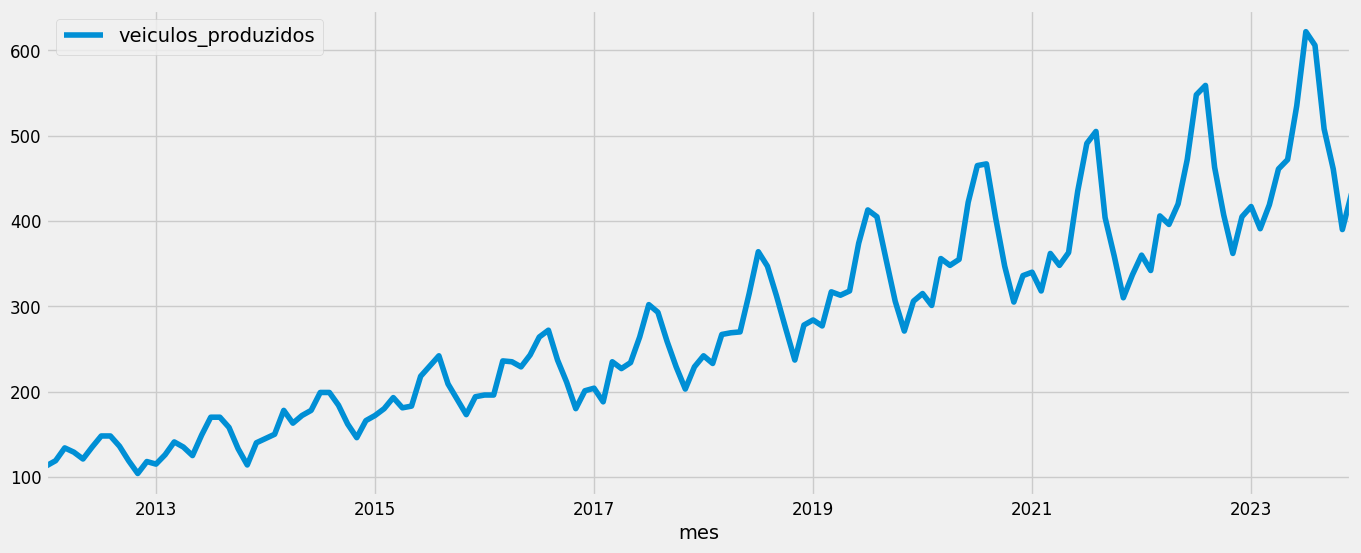

In [24]:
# Plot da Série Temporal - aqui já observamos algumas tendências.
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência. 

- Sazonalidade - o fenômeno se repete em períodos fixos.
- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Mas, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.


> Gráfico de Densidade - Segunda Análise de Tendência

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico: 

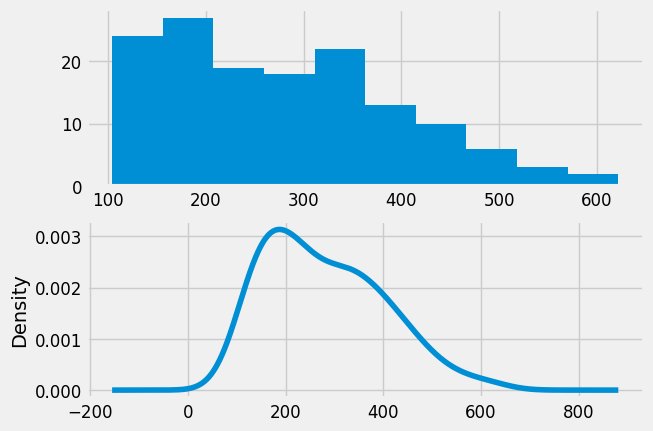

In [25]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.veiculos_produzidos.hist()

# Subplot 2
plt.subplot(212)
dados_serie.veiculos_produzidos.plot(kind = 'kde')
plt.show()


Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

> BoxPlots - Terceira Análise de Tendência

Vamos agora criar BoxPlots para cada ano da série.

Text(0, 0.5, '\nVeículos Produzidos')

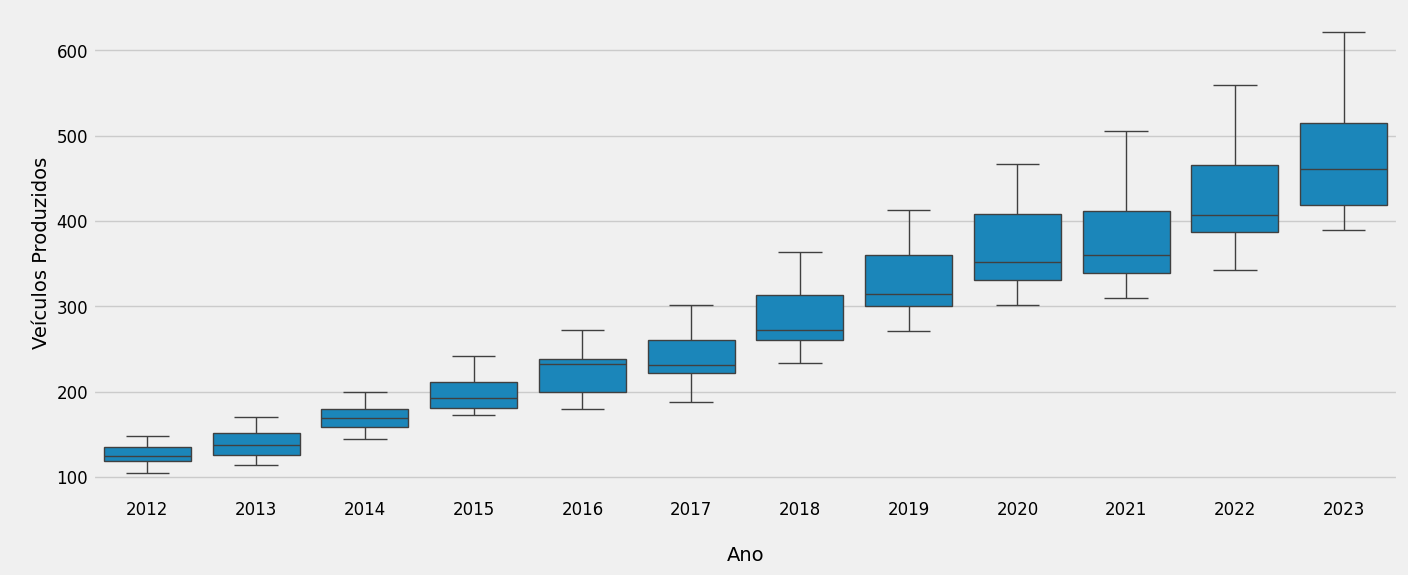

In [26]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15, 6))

# Define as variáveis
indice_ano = dados_serie.veiculos_produzidos.index.year
valor = dados_serie.veiculos_produzidos

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nVeículos Produzidos")

Análise:

- O aumento da mediana ao longo dos anos confirma uma tendência ascendente.
- Aumento constante da dispersão ao redor da mediana dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

## Visualizando a Decomposição da Série Temporal

Vamos então decompor nossa série temporal (leia os manuais em pdf no Capítulo 8).

In [27]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie,
                                                        model = 'multiplicative',
                                                        extrapolate_trend = 'freq')

In [28]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

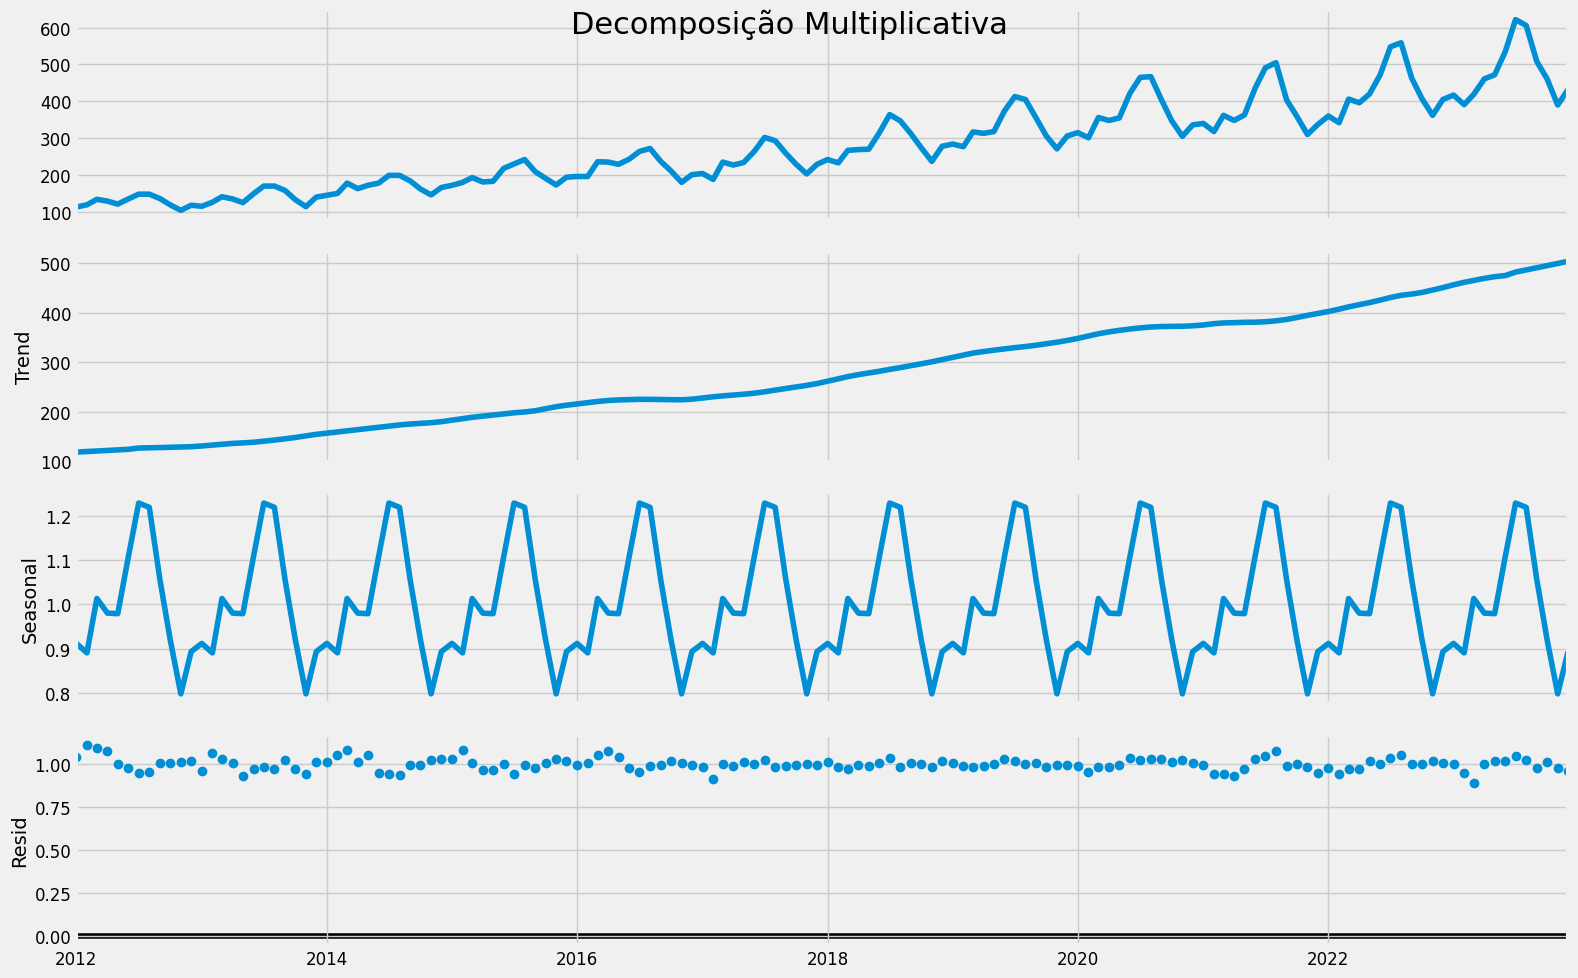

In [29]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [30]:
# Decomposição Aditiva
decomposicao_adtitiva = sm.tsa.seasonal_decompose(dados_serie,
                                                  model = 'aditive',
                                                  extrapolate_trend = 'freq')

In [31]:
# Tipo do objeto
type(decomposicao_adtitiva)

statsmodels.tsa.seasonal.DecomposeResult

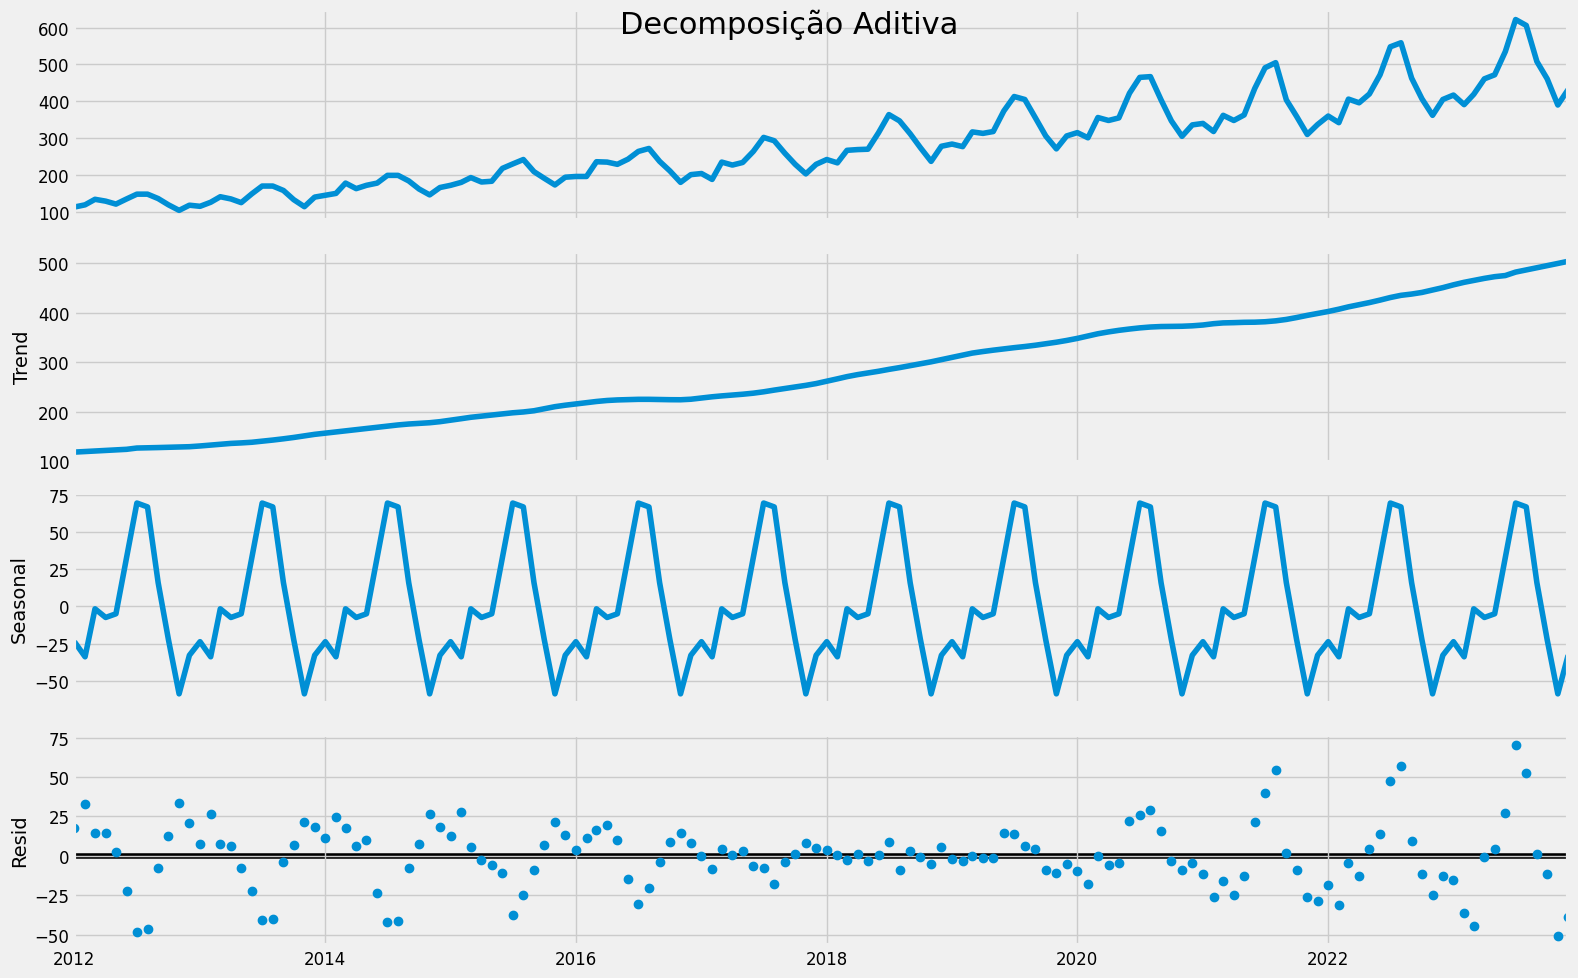

In [32]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_adtitiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

> Análise da Decomposição da Série

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de veículos produzidos.

2- A segunda linha mostra a tendência da série, que claramente é uma tendência de crescimento, ou seja, o número de veículos produzidos tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos valores maiores ou menores do número de veículos produzidos. Isso talvez possa ser explicado por eventos baseados em calendário (verão, inverno, férias escolares, etc...).

4- A quarta linha é o componete irregular ou resíduo.

Definir **extrapolate_trend = 'freq'** remove valores NaN na tendência e nos resíduos (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. 

Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

## Extração dos Componentes da Série Temporal

Regra de extração:

**Valores Reais = (sazonal * tendência * resíduo)**

In [33]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal,
                                      decomposicao_multiplicativa.trend,
                                      decomposicao_multiplicativa.resid,
                                      decomposicao_multiplicativa.observed], axis = 1)

In [34]:
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [35]:
# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2012-01-01,0.912060,118.864948,1.042321,113.0
2012-02-01,0.890694,119.990822,1.113449,119.0
2012-03-01,1.013408,121.116696,1.091733,134.0
2012-04-01,0.980383,122.242570,1.076395,129.0
2012-05-01,0.979185,123.368444,1.001651,121.0


In [36]:
# Dados originais
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 2012-01-01 = 113.0
- Série na data 2012-01-01 = Sazonalidade x Tendência x Resíduos = 0.912060 x 118.864948 x 1.042321 = 113.0

In [37]:
# Cálculo em Python
valor_observado = 0.912060 * 118.864948 * 1.042321
print(valor_observado)

113.00006722133676


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.

Concluímos assim a primeira parte do Lab. Vamos para a segunda parte.

# Fim da Parte 1